# Exploratory Data Analysis: Cleaned Data Science Job Market & Salaries 2024

## Overview

The data science job market in 2024 continues to grow rapidly, driven by advancements in AI, machine learning, and data analytics. This project uses a cleaned dataset of job postings to analyze trends in salaries, skills, roles, and geographical demand across the industry. By performing exploratory data analysis (EDA), the aim is to uncover actionable insights that help job seekers like me, employers, and researchers understand the current landscape of the data science job market.

## Case Study: Navigating the Data Science Job Market
The data science field offers diverse opportunities with varying salary ranges and skill requirements. However, job seekers often face challenges, such as understanding regional differences in salaries, identifying the most in-demand skills, and determining how experience impacts pay. Similarly, employers need to benchmark salaries to attract top talent.

This case study explores these challenges by analyzing the **Cleaned Data Science Job Market & Salaries 2024** dataset to answer critical questions:
1. What are most common Job positions?
2. What are the top-paying roles, companies, location in the data science field?
3. What is the relationship between company rating and salary?

## Dataset
The dataset used for this analysis is the **Cleaned Data Science Job Market & Salaries 2024** dataset, sourced from Kaggle. It contains detailed information about job postings in the data science field, providing valuable insights into roles, salaries, company ratings, and more.

### Dataset Columns
| Column Name      | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| `Job Title`       | The title of the job position being advertised (e.g., Data Scientist, Machine Learning Engineer, Data Analyst). |
| `Company Name`    | The name of the company offering the job position.                        |
| `Location`        | The geographical location where the job is based.                         |
| `Job Link`        | A URL to the job posting for more details.                                |
| `Company Rating`  | A rating out of 5 for the company, typically based on employee reviews.   |
| `Min Salary`      | The minimum salary offered for the position, extracted from the original salary range. |
| `Max Salary`      | The maximum salary offered for the position, extracted from the original salary range. |
| `Posting Date`    | The date when the job was posted, converted from a relative time format (e.g., 30d+) to an actual date. |

### Dataset Overview
- **Number of Rows**: 485
- **Number of Columns**: 8
- **Data Source**: Kaggle - *Cleaned Data Science Job Market & Salaries 2024*

This dataset is well-structured and cleaned, ready for exploratory data analysis to uncover trends and insights in the 2024 data science job market. For more information about dataset https://www.kaggle.com/datasets/sajkazmi/cleaned-data-science-job-market-and-salaries-2024

## Tasks

The following tasks will guide the analysis process:

1. **Data Loading and Inspection**:
   - Load the dataset and inspect its structure, data types, and overall quality.
   - Identify missing values and inconsistencies.


2. **Data Cleaning**:
   - Handle missing values and duplicates.
   - Understand data and create new columns
   - Remove columns not needed


3. **Most Popular Jobs**
    - Most common job positions in data science field.


4. **Salary Analysis**: 
   - Analyze salary trends across job roles, companies and locations.

## Task 1: Data Loading and Inspection

In [491]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [492]:
# Load a CSV file
df = pd.read_csv('/Users/adeenaamersi/Desktop/Adeena/Desktop/Project_Portfolio/Job_Market/clean_data.csv')

# display count of rows & columns
print(df.shape)

# Display the first few rows of the dataframe
df.head()

(485, 8)


,Job Title,Company Name,Location,Date,Job Link,Company Rating,Min Salary,Max Salary
0,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",30d+,https://www.glassdoor.com/partner/jobListing.h...,2.7,57.0,84.0
1,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",30d+,https://www.glassdoor.com/partner/jobListing.h...,3.4,106.0,157.0
2,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",11d,https://www.glassdoor.com/partner/jobListing.h...,4.2,105.0,141.0
3,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",1d,https://www.glassdoor.com/partner/jobListing.h...,3.6,90.0,113.0
4,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",30d+,https://www.glassdoor.com/partner/jobListing.h...,3.6,89.0,148.0


In [493]:
# display data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       485 non-null    object 
 1   Company Name    485 non-null    object 
 2   Location        485 non-null    object 
 3   Date            485 non-null    object 
 4   Job Link        485 non-null    object 
 5   Company Rating  439 non-null    float64
 6   Min Salary      379 non-null    float64
 7   Max Salary      379 non-null    float64
dtypes: float64(3), object(5)
memory usage: 30.4+ KB


In [494]:
# descriptive analysis
df.describe().round(2)

,Company Rating,Min Salary,Max Salary
count,439.00,379.00,379.00
mean,3.81,103.15,149.55
std,0.48,40.67,65.40
min,1.00,14.00,0.00
25%,3.60,74.00,110.00
50%,3.80,98.00,149.00
75%,4.00,127.00,180.00
max,5.00,220.00,357.00


## Task 2: Data Cleaning

In [495]:
# checking missing values 
df.isna().sum()

Job Title           0
Company Name        0
Location            0
Date                0
Job Link            0
Company Rating     46
Min Salary        106
Max Salary        106
dtype: int64

In [496]:
# checking duplicate values
df.duplicated().sum()

0

In [497]:
# removing records without company rating as it might not give much infomation 
# I don't have much information about source of original dataset, therefore removing missing values, than to impute and have incorrect information
df_cleaned = df.dropna(subset=['Company Rating', 'Min Salary', 'Min Salary'])

print(df_cleaned.shape)
df_cleaned.head()

(348, 8)


,Job Title,Company Name,Location,Date,Job Link,Company Rating,Min Salary,Max Salary
0,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",30d+,https://www.glassdoor.com/partner/jobListing.h...,2.7,57.0,84.0
1,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",30d+,https://www.glassdoor.com/partner/jobListing.h...,3.4,106.0,157.0
2,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",11d,https://www.glassdoor.com/partner/jobListing.h...,4.2,105.0,141.0
3,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",1d,https://www.glassdoor.com/partner/jobListing.h...,3.6,90.0,113.0
4,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",30d+,https://www.glassdoor.com/partner/jobListing.h...,3.6,89.0,148.0


In [498]:
# checking missing values
df_cleaned.isna().sum()

Job Title         0
Company Name      0
Location          0
Date              0
Job Link          0
Company Rating    0
Min Salary        0
Max Salary        0
dtype: int64

In [499]:
# remove company rating from Company name
split_df = df_cleaned['Company Name'].str.split('\n', expand=True)
split_df.columns = ['Company Name upd', 'Company Rating upd']
df_cleaned = pd.concat([df_cleaned, split_df], axis=1)
df_cleaned['Company Name'] = df_cleaned['Company Name upd']
df_cleaned = df_cleaned.drop(['Company Name upd', 'Company Rating upd'], axis=1)

# Add Average Salary column: (Min Salary + Max Salary) / 2
df_cleaned['Average Salary'] = (df_cleaned['Min Salary'] + df_cleaned['Max Salary']) / 2

# Remove Job Link and Date column
df_cleaned = df_cleaned.drop(['Job Link', 'Date'], axis=1)

# remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

print(df_cleaned.shape)
df_cleaned.head()

(227, 7)


,Job Title,Company Name,Location,Company Rating,Min Salary,Max Salary,Average Salary
0,Associate Stop Loss Underwriter,The Insurance Center,"Onalaska, WI",2.7,57.0,84.0,70.5
1,Manager of Data Science,"Nuvative, Inc.","Wichita, KS",3.4,106.0,157.0,131.5
2,Senior Data Product Manager,ProviderTrust,"Nashville, TN",4.2,105.0,141.0,123.0
3,Oncology Nurse Navigator,Inizio Engage,"Portland, OR",3.6,90.0,113.0,101.5
4,Head of Artificial Intelligence – Americas Region,Covestro,"Pittsburgh, PA",3.6,89.0,148.0,118.5


## Task 3: Most Popular Jobs

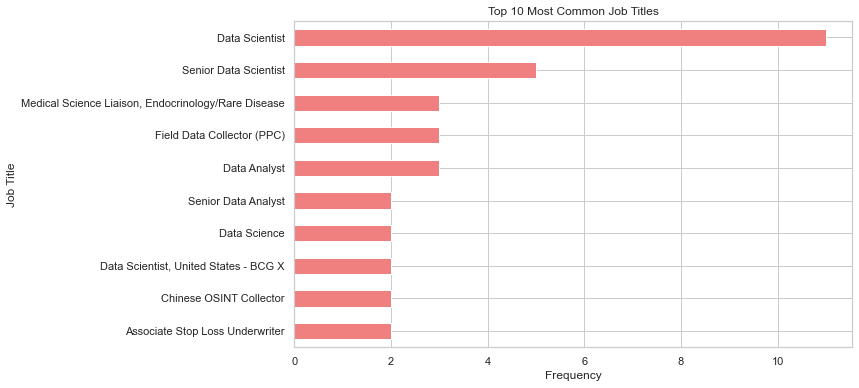

In [509]:
# Plot top 10 most frequent job titles
top_job_titles = df_cleaned['Job Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_job_titles.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.gca().invert_yaxis()  # To have the highest frequency at the top
plt.show()

The graph illustrates the top 10 most common job titles in the data-related job market, highlighting trends in demand and specialization. "Data Scientist" leads with the highest frequency, showcasing its high demand in the job market, while "Senior Data Scientist" and "Senior Data Analyst" emphasize the need for experienced professionals in leadership roles. Interdisciplinary applications of data expertise are evident in roles like "Medical Science Liaison, Endocrinology/Rare Disease" and "Field Data Collector (PPC)." Additionally, positions such as "Chinese OSINT Collector" and "Associate Stop Loss Underwriter" reflect unique and specialized opportunities, while "Data Scientist, United States - BCG X" indicates targeted geographic roles. The prominence of "Data Scientist" and "Senior Data Scientist" underscores the core demand for data expertise. Moreover, the diversity of job titles demonstrates opportunities not only in traditional data science roles but also in specialized, interdisciplinary, and educational fields, emphasizing the growing importance of preparing the next generation of professionals.

## Task 4: Salary Analysis

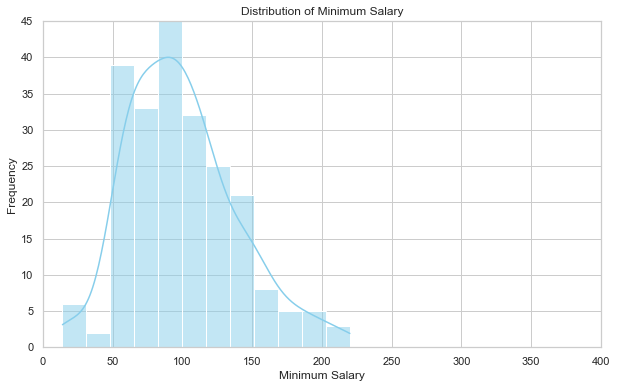

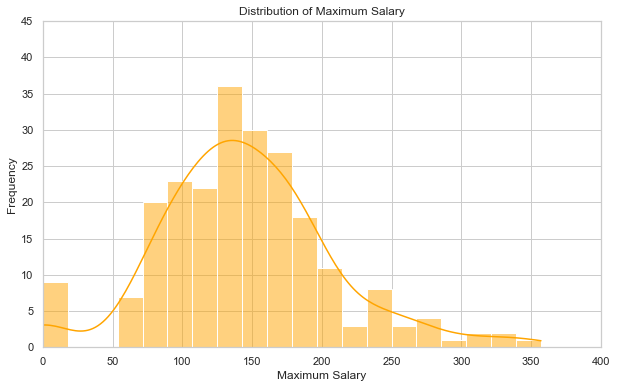

In [503]:
# Plot the distribution of Min Salary
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Min Salary'], kde=True, color='skyblue', bins=12)
plt.title('Distribution of Minimum Salary')
plt.xlabel('Minimum Salary')
plt.ylabel('Frequency')
plt.xlim(0, 400)   
plt.ylim(0, 45)  
plt.show()

# Plot the distribution of Max Salary
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Max Salary'], kde=True, color='orange', bins=20)
plt.title('Distribution of Maximum Salary')
plt.xlabel('Maximum Salary')
plt.ylabel('Frequency')
plt.xlim(0, 400)   
plt.ylim(0, 45)
plt.show()

The two graphs illustrate the distributions of minimum and maximum salaries for data-related job roles, showcasing key patterns in compensation. The minimum salary distribution is slightly right-skewed, with most minimum salaries ranging between $50,000 and $150,000. Fewer positions offer minimum salaries above $150,000, and only a small fraction exceed $250,000. Similarly, the maximum salary distribution follows a right-skewed pattern, with the majority of maximum salaries concentrated between $100,000 and $200,000. A limited number of roles provide maximum salaries above $250,000, with some extending beyond $300,000.

Both graphs highlight right-skewed distributions, reflecting that while higher salaries exist, they are relatively uncommon. The range of maximum salaries is broader and extends higher than that of minimum salaries, indicating potential earnings growth within these roles. For many positions, minimum salaries fall between $50,000 and $150,000, while maximum salaries span from $100,000 to $200,000, suggesting a typical growth range of $50,000 to $100,000 through bonuses or progression. A subset of roles offers exceptionally high maximum salaries exceeding $250,000, signaling premium compensation for specialized expertise or leadership roles. These distributions underscore a robust job market with opportunities across various salary levels, catering to entry-level, mid-level, and senior professionals. Collectively, the graphs offer valuable insights into salary expectations, emphasizing the importance of understanding compensation ranges when pursuing data-related careers.

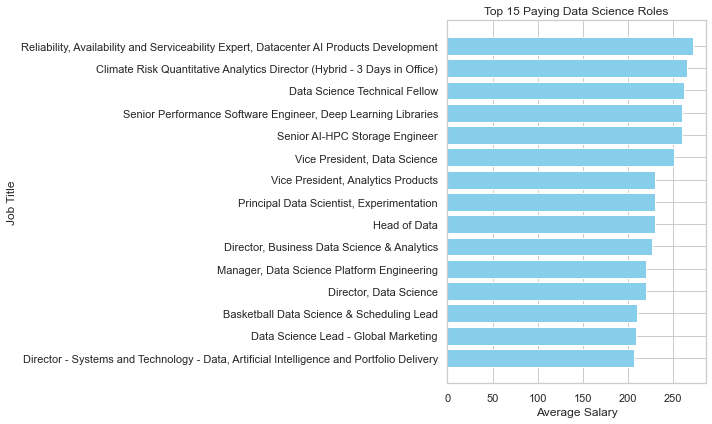

In [502]:
# Plot top 15 high paying job roles
salary_trend = df_cleaned.sort_values(by=['Average Salary'], ascending=[False])
salary_trend_bar_1 = salary_trend[['Job Title', 'Average Salary']].head(15)

plt.figure(figsize=(10, 6))
plt.barh(salary_trend_bar_1['Job Title'], salary_trend_bar_1['Average Salary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 15 Paying Data Science Roles')
plt.gca().invert_yaxis()  # Invert y-axis so the highest paying job is at the top
plt.tight_layout()

# Show the plot
plt.show()

The highest paying data science roles are predominantly senior-level positions with a strong emphasis on technical expertise, leadership, and niche specializations. Roles such as "Reliability, Availability and Serviceability Expert, Datacenter AI Products Development" and "Climate Risk Quantitative Analytics Director (Hybrid - 3 Days in Office)" top the chart with salaries close to $250,000, indicating the high value placed on specialized expertise in AI and datacenter operations, as well as climate risk analytics. Other well-compensated positions include "Data Science Technical Fellow," "Senior Performance Software Engineer, Deep Learning Libraries," and various leadership roles such as "Vice President, Data Science" and "Head of Data," which highlight the demand for senior technical and managerial expertise. Additional roles like "Basketball Data Science & Scheduling Lead" and "Data Science Lead - Global Marketing" demonstrate the lucrative nature of niche specializations within the field. Overall, the highest paying data science roles reflect the strategic importance and high demand for technical skills, leadership, and specialized knowledge across various domains.

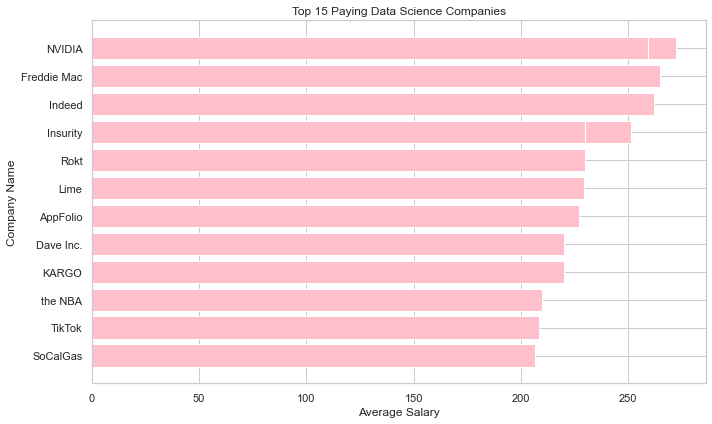

In [510]:
# Plot top 15 high paying companies
salary_trend_bar_2 = salary_trend[['Company Name', 'Average Salary']].head(15)

plt.figure(figsize=(10, 6))
plt.barh(salary_trend_bar_2['Company Name'], salary_trend_bar_2['Average Salary'], color='pink')
plt.xlabel('Average Salary')
plt.ylabel('Company Name')
plt.title('Top 15 Paying Data Science Companies')
plt.gca().invert_yaxis()  # Invert y-axis so the highest paying job is at the top
plt.tight_layout()

# Show the plot
plt.show()

The chart reveals that NVIDIA offers the highest average salary for data science roles, close to 250,000. Other top-paying companies include Freddie Mac, Indeed, Insurity, and Rokt, with average salaries ranging from approximately 200,000 to 250,000. This data highlights the competitive nature of salaries in the data science field, particularly within these leading companies, making them attractive options for job seekers aiming for high compensation in data science roles.

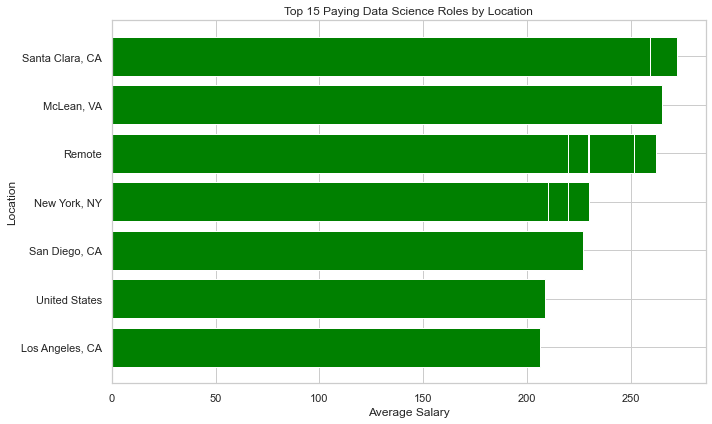

In [507]:
# Plot top 15 high paying locations
salary_trend_bar_3 = salary_trend[['Location', 'Average Salary']].head(15)

plt.figure(figsize=(10, 6))
plt.barh(salary_trend_bar_3['Location'], salary_trend_bar_3['Average Salary'], color='green')
plt.xlabel('Average Salary')
plt.ylabel('Location')
plt.title('Top 15 Paying Data Science Roles by Location')
plt.gca().invert_yaxis()  # Invert y-axis so the highest paying job is at the top
plt.tight_layout()

# Show the plot
plt.show()

The chart reveals that Santa Clara, CA, offers the highest average salaries for data science positions, approaching $250,000. McLean, VA, follows closely with similarly high salaries. Remote positions also offer competitive salaries, slightly lower than McLean, VA. New York, NY, and San Diego, CA, present similar average salaries, just below those for remote roles. The average salary for data science roles across the United States is slightly lower than in San Diego, CA, while Los Angeles, CA, has the lowest average salary among the listed locations, though still substantial. These findings highlight the premium compensation for data science roles in tech hubs like Santa Clara and McLean, as well as the strong salary offerings for remote positions, making them attractive options for professionals in the field.

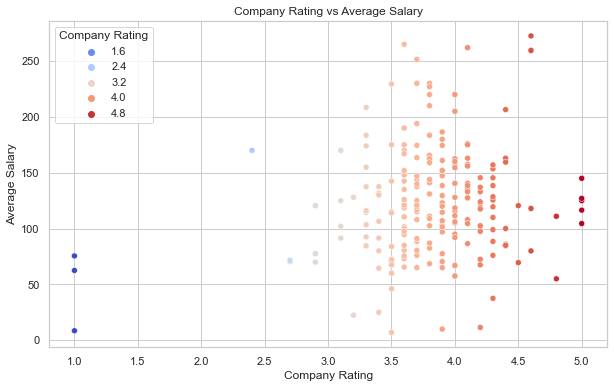

In [506]:
# Scatter plot for Company Rating vs Min Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Rating', y='Average Salary', data=df_cleaned, hue='Company Rating', palette='coolwarm')
plt.title('Company Rating vs Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.show()

The scatter plot titled "Company Rating vs Average Salary" highlights a positive correlation between company ratings and average salaries. Higher-rated companies (with ratings between 3.0 to 5.0) tend to offer higher average salaries, as indicated by the concentration of data points in the upper right quadrant of the plot. Notably, the highest salaries, nearing $250,000, are associated with companies having ratings closer to 4.8, suggesting that companies with better reputations and employee satisfaction also provide more competitive compensation. This trend underscores the importance of company culture and overall employee satisfaction in attracting and retaining top talent through attractive salary offerings.